**Importing all the required Packages and Libraries**

In [ ]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

**storing** **path** **locations**

In [ ]:
# Paths for data.
Ravdess = "/content/drive/MyDrive/Ravdess/audio_speech_actors_01-24/"
Crema = "/content/drive/MyDrive/Crema/"
Tess = "/content/drive/MyDrive/Tess/"
Savee = "/content/drive/MyDrive/Savee/"

In [ ]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,happy,/content/drive/MyDrive/Ravdess/audio_speech_ac...
1,angry,/content/drive/MyDrive/Ravdess/audio_speech_ac...
2,neutral,/content/drive/MyDrive/Ravdess/audio_speech_ac...
3,angry,/content/drive/MyDrive/Ravdess/audio_speech_ac...
4,angry,/content/drive/MyDrive/Ravdess/audio_speech_ac...


**CREMA-D (Crowd-Sourced Emotional Multimodal Actors Dataset)**

In [ ]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,happy,/content/drive/MyDrive/Crema/1081_TAI_HAP_XX.wav
1,fear,/content/drive/MyDrive/Crema/1081_DFA_FEA_XX.wav
2,sad,/content/drive/MyDrive/Crema/1081_IEO_SAD_LO.wav
3,happy,/content/drive/MyDrive/Crema/1079_ITH_HAP_XX.wav
4,neutral,/content/drive/MyDrive/Crema/1081_IOM_NEU_XX.wav


**TESS (Toronto Emotional Speech Set)**

In [ ]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,sad,/content/drive/MyDrive/Tess/YAF_sad/YAF_hate_s...
1,sad,/content/drive/MyDrive/Tess/YAF_sad/YAF_door_s...
2,sad,/content/drive/MyDrive/Tess/YAF_sad/YAF_choice...
3,sad,/content/drive/MyDrive/Tess/YAF_sad/YAF_join_s...
4,sad,/content/drive/MyDrive/Tess/YAF_sad/YAF_five_s...


**SAVEE (Surrey Audio-Visual Expressed Emotion)**

In [ ]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

,Emotions,Path
0,angry,/content/drive/MyDrive/Savee/DC_a10.wav
1,angry,/content/drive/MyDrive/Savee/DC_a05.wav
2,angry,/content/drive/MyDrive/Savee/DC_a02.wav
3,angry,/content/drive/MyDrive/Savee/DC_a09.wav
4,angry,/content/drive/MyDrive/Savee/DC_a01.wav


In [ ]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,happy,/content/drive/MyDrive/Ravdess/audio_speech_ac...
1,angry,/content/drive/MyDrive/Ravdess/audio_speech_ac...
2,neutral,/content/drive/MyDrive/Ravdess/audio_speech_ac...
3,angry,/content/drive/MyDrive/Ravdess/audio_speech_ac...
4,angry,/content/drive/MyDrive/Ravdess/audio_speech_ac...


In [ ]:
print(data_path['Emotions'].value_counts())

happy       1923
angry       1923
sad         1923
fear        1923
disgust     1923
neutral     1703
surprise     652
calm         192
Name: Emotions, dtype: int64


['angry' 'calm' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']
happy       1923
angry       1923
sad         1923
fear        1923
disgust     1923
neutral     1703
surprise     652
calm         192
Name: Emotions, dtype: int64


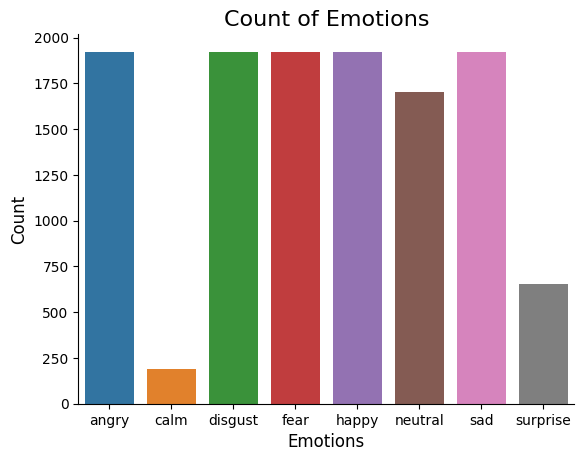

In [ ]:
from sklearn.preprocessing import LabelEncoder

# create label encoder object
le = LabelEncoder()
col=data_path['Emotions'].unique().tolist()
# encode emotions column as numerical labels
df_emotions= pd.DataFrame({"Emotions":le.fit_transform(data_path['Emotions'])})

# plot count of emotions
plt.title('Count of Emotions', size=16)
sns.countplot(x='Emotions', data=df_emotions)
print(le.classes_)  # print out the list of emotion labels
print(data_path['Emotions'].value_counts())
plt.xticks(ticks=range(len(le.classes_)), labels=le.classes_)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()




In [ ]:
data_path['Emotions'].unique().tolist()

['happy', 'angry', 'neutral', 'sad', 'calm', 'fear', 'disgust', 'surprise']

In [ ]:
def create_waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(f'Waveplot ({emotion})', size=16)
    plt.plot(data, color='blue')
    plt.xlabel('Sample', size=12)
    plt.ylabel('Amplitude', size=12)
    plt.show()

def create_spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

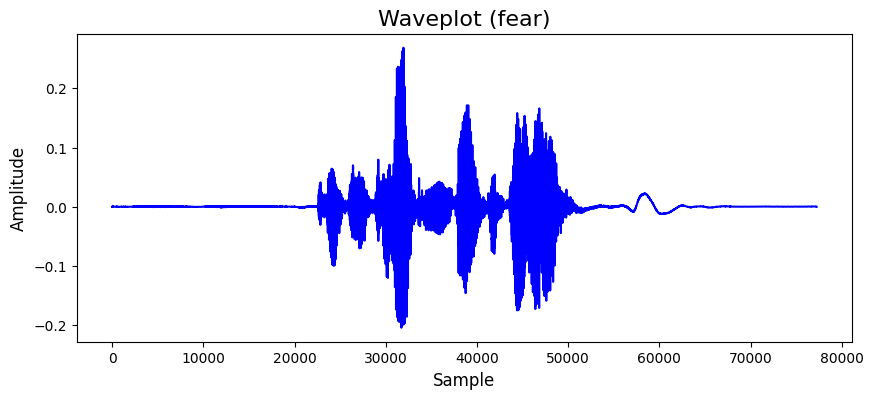

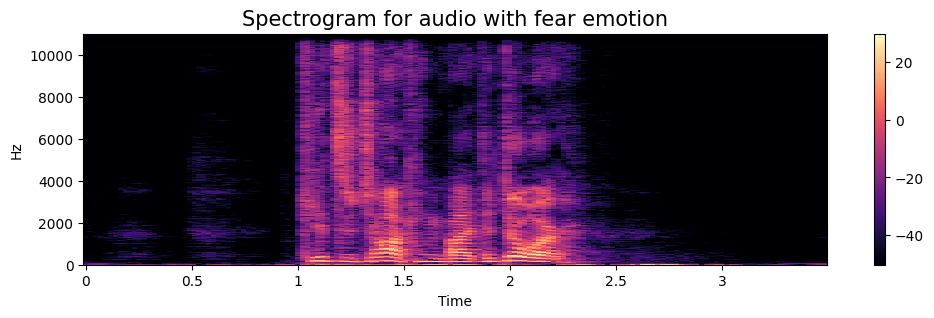

In [ ]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

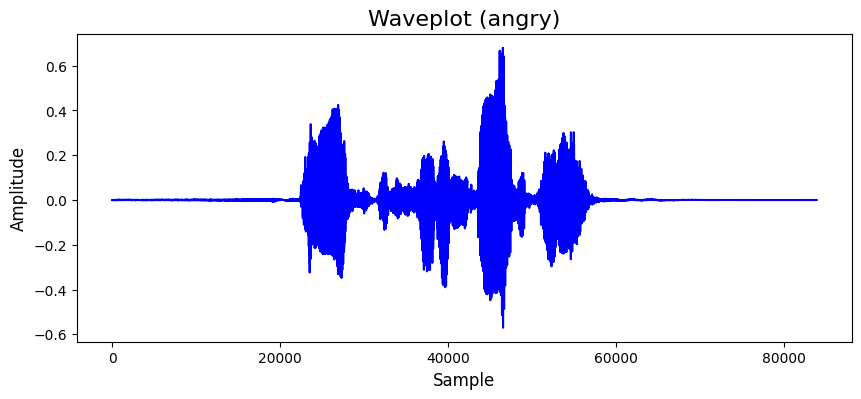

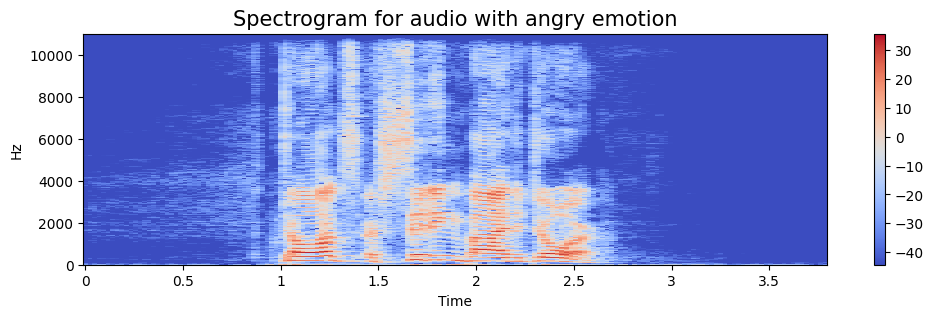

In [ ]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

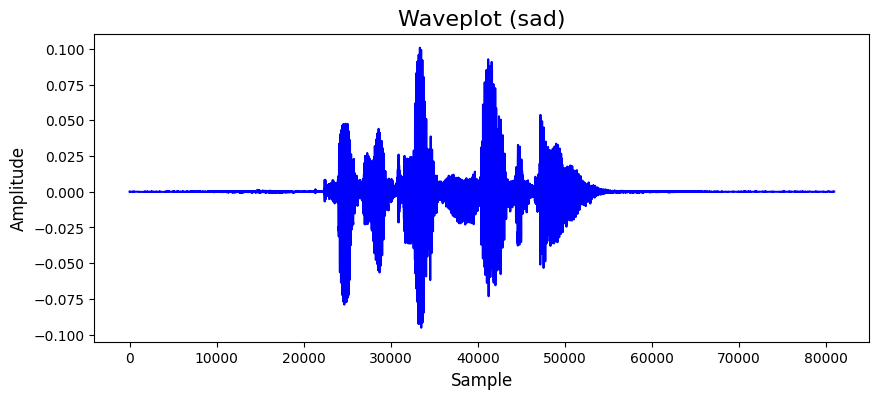

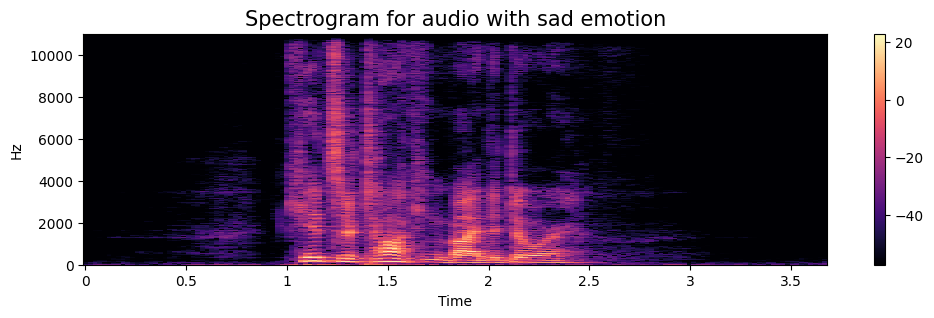

In [ ]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

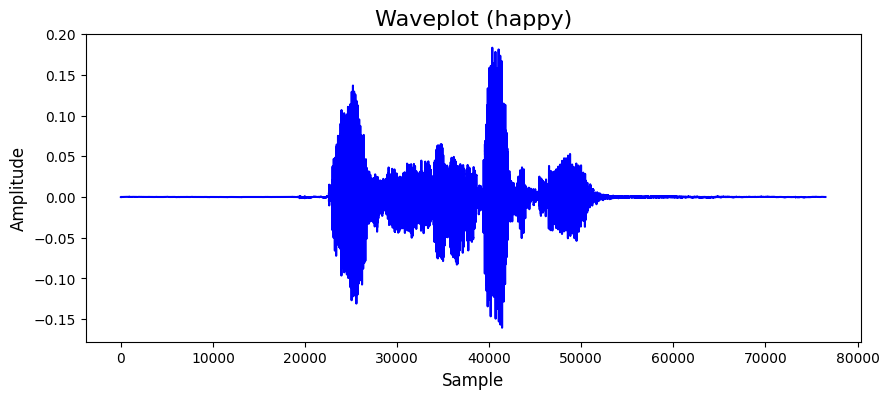

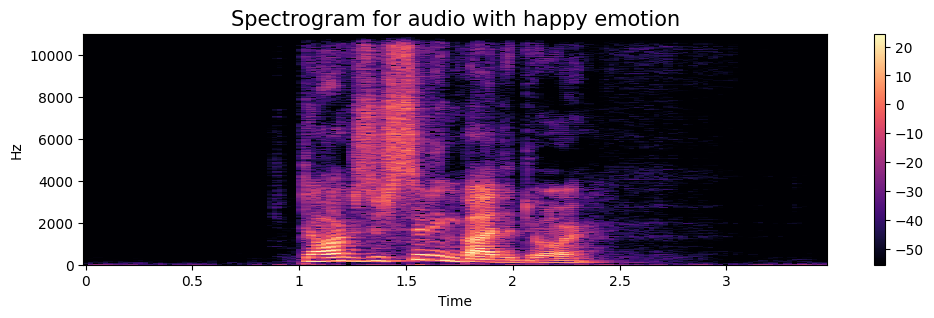

In [ ]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
def mfcc(data, sampling_rate):
    mfcc_feature = librosa.feature.mfcc(y = data, sr = sampling_rate)
    return np.ravel(mfcc_feature.T)

In [ ]:
path = np.array((data_path["Path"]))[100]
data, sampling_rate = librosa.load(path, duration = 2.5, offset = 0.6)
print("Length of data: ", len(data))
print("MFrequency Cepstral Coefficients: ", mfcc(data, sampling_rate).shape)

Length of data:  55125
MFrequency Cepstral Coefficients:  (2160,)


In [ ]:
def get_features(path, duration = 2.5, offset = 0.6):
    data, sampling_rate = librosa.load(path, duration = duration,  offset = offset)
    return mfcc(data, sampling_rate)

In [ ]:
data, sampling_rate = librosa.load(path)

In [ ]:
data

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0334226e-05,
       6.9482103e-06, 0.0000000e+00], dtype=float32)

In [ ]:
sampling_rate

22050

In [ ]:
data_path.Path

0      /content/drive/MyDrive/Ravdess/audio_speech_ac...
1      /content/drive/MyDrive/Ravdess/audio_speech_ac...
2      /content/drive/MyDrive/Ravdess/audio_speech_ac...
3      /content/drive/MyDrive/Ravdess/audio_speech_ac...
4      /content/drive/MyDrive/Ravdess/audio_speech_ac...
                             ...                        
475             /content/drive/MyDrive/Savee/KL_su14.wav
476             /content/drive/MyDrive/Savee/KL_su01.wav
477             /content/drive/MyDrive/Savee/KL_su02.wav
478             /content/drive/MyDrive/Savee/KL_sa04.wav
479             /content/drive/MyDrive/Savee/KL_sa08.wav
Name: Path, Length: 12162, dtype: object

In [ ]:
data_path.Emotions.shape

(12162,)

In [ ]:
data_path.Path.shape[0]

12162

In [ ]:
d_path=data_path.copy()

In [ ]:
d_path=d_path.sample(6000)
d_path.head()

,Emotions,Path
2617,fear,/content/drive/MyDrive/Tess/OAF_Fear/OAF_bone_...
5805,neutral,/content/drive/MyDrive/Crema/1030_ITH_NEU_XX.wav
2203,fear,/content/drive/MyDrive/Crema/1057_IWW_FEA_XX.wav
5601,angry,/content/drive/MyDrive/Crema/1027_IOM_ANG_XX.wav
158,happy,/content/drive/MyDrive/Crema/1080_ITH_HAP_XX.wav


In [ ]:
X, Y = [], []
print('Feature processing...')
for path, emotion, index in zip(d_path.Path, d_path.Emotions, range(d_path.Path.shape[0])):
    data, sampling_rate = librosa.load(path, duration = 2.5,  offset = 0.6)
    mfcc_feature = np.mean(librosa.feature.mfcc(y = data, sr = sampling_rate,n_mfcc = 40).T,axis=0)
    if index % 1000 == 0:
        print(f"{index} samples has been processed...")
    X.append(mfcc_feature)
    Y.append(emotion)
print('Done.')

Feature processing...
0 samples has been processed...
1000 samples has been processed...
2000 samples has been processed...
3000 samples has been processed...
4000 samples has been processed...
5000 samples has been processed...
Done.


In [ ]:
data

array([-1.9441482e-03, -1.4956351e-03, -1.1776694e-03, ...,
        2.6396759e-05,  5.5596010e-05,  4.8814356e-05], dtype=float32)

In [ ]:
len(X)

6000

In [ ]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('/content/drive/MyDrive/features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,labels
0,-438.921112,86.243210,30.661564,-6.673663,-16.853071,-4.586492,-11.496315,5.285834,-20.780426,-3.629405,...,-1.880916,4.953981,3.495450,-5.101579,-11.037097,-6.216575,7.625387,-5.661238,-2.531791,fear
1,-403.597992,146.681824,1.808634,55.253071,-21.348740,22.508669,-20.554750,2.462571,-12.100918,10.829062,...,-1.670159,0.424337,-3.540474,3.269190,0.118493,3.922621,-2.467131,1.739393,-0.783467,neutral
2,-401.450592,136.323547,11.635090,54.025333,-18.929396,31.283386,-15.483850,11.939356,-13.036295,0.269737,...,-1.273977,3.700251,-3.554414,0.531652,-3.318306,2.660567,-1.863293,1.842927,0.059560,fear
3,-225.303543,114.080627,-29.590370,52.442638,-20.093611,7.295140,-21.449976,15.920595,-24.233212,-3.704239,...,3.701039,5.360962,1.386777,7.455206,2.626505,7.370326,1.293536,5.067319,0.300607,angry
4,-359.777985,138.158066,3.279741,43.760174,-12.169499,16.098801,-15.005041,7.344002,-11.253256,1.338122,...,-0.404370,3.513835,-2.737457,1.268274,-0.600549,3.176862,-0.774926,0.573165,0.097399,happy


In [ ]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [ ]:

encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4500, 40), (4500, 8), (1500, 40), (1500, 8))

In [ ]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4500, 40), (4500, 8), (1500, 40), (1500, 8))

In [ ]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4500, 40, 1), (4500, 8), (1500, 40, 1), (1500, 8))

In [ ]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 40, 256)           1536      
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 20, 256)          0         
 g1D)                                                            
                                                                 
 conv1d_13 (Conv1D)          (None, 20, 256)           327936    
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 10, 256)          0         
 g1D)                                                            
                                                                 
 conv1d_14 (Conv1D)          (None, 10, 128)           163968    
                                                                 
 max_pooling1d_14 (MaxPoolin  (None, 5, 128)          

In [ ]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
71/71 [==============================] - 14s 170ms/step - loss: 1.8998 - accuracy: 0.2318 - val_loss: 1.7064 - val_accuracy: 0.3480 - lr: 0.0010
Epoch 2/50
71/71 [==============================] - 11s 161ms/step - loss: 1.6840 - accuracy: 0.3244 - val_loss: 1.5187 - val_accuracy: 0.4120 - lr: 0.0010
Epoch 3/50
71/71 [==============================] - 13s 178ms/step - loss: 1.5540 - accuracy: 0.3853 - val_loss: 1.4208 - val_accuracy: 0.4447 - lr: 0.0010
Epoch 4/50
71/71 [==============================] - 13s 179ms/step - loss: 1.4784 - accuracy: 0.4151 - val_loss: 1.4258 - val_accuracy: 0.4280 - lr: 0.0010
Epoch 5/50
71/71 [==============================] - 13s 177ms/step - loss: 1.4167 - accuracy: 0.4424 - val_loss: 1.3169 - val_accuracy: 0.4827 - lr: 0.0010
Epoch 6/50
71/71 [==============================] - 13s 178ms/step - loss: 1.3658 - accuracy: 0.4660 - val_loss: 1.2944 - val_accuracy: 0.4993 - lr: 0.0010
Epoch 7/50
71/71 [==============================] - 12s 169ms/st

47/47 [==============================] - 1s 14ms/step - loss: 2.0107 - accuracy: 0.5500
Accuracy of our model on test data :  55.000001192092896 %


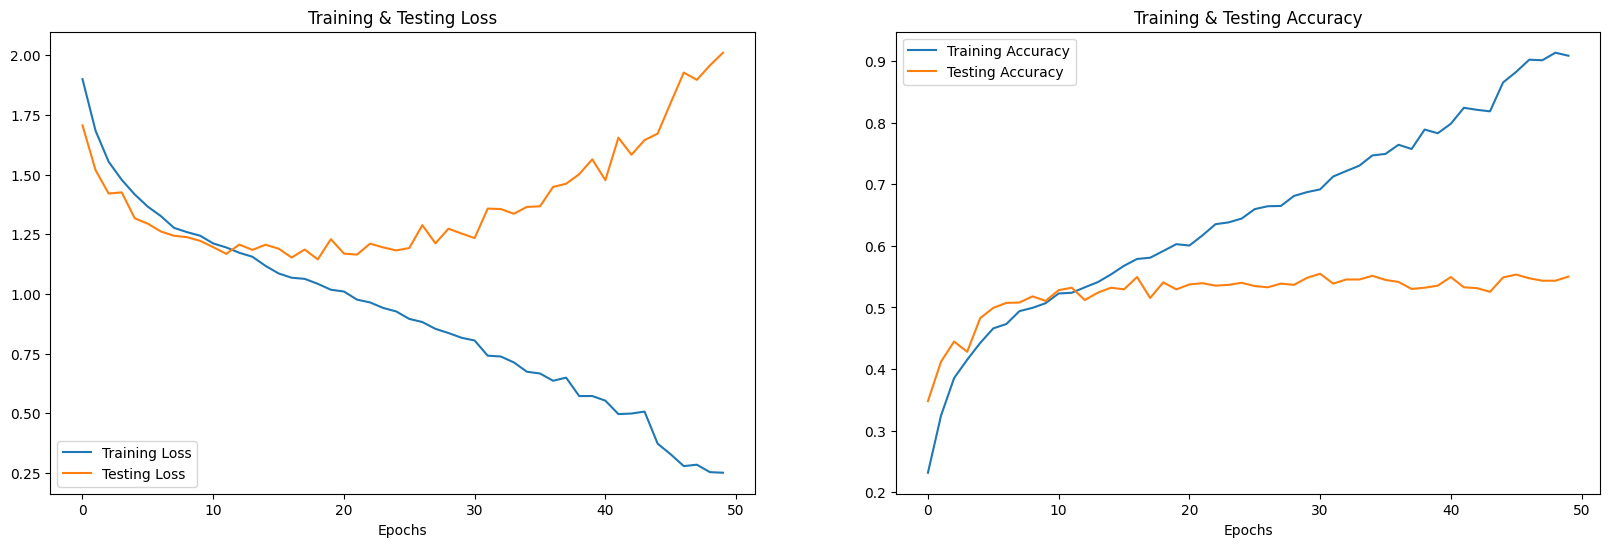

In [ ]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

47/47 [==============================] - 1s 23ms/step


In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,neutral,disgust
1,neutral,fear
2,neutral,neutral
3,fear,fear
4,angry,angry
5,neutral,neutral
6,neutral,neutral
7,disgust,disgust
8,calm,disgust
9,fear,fear


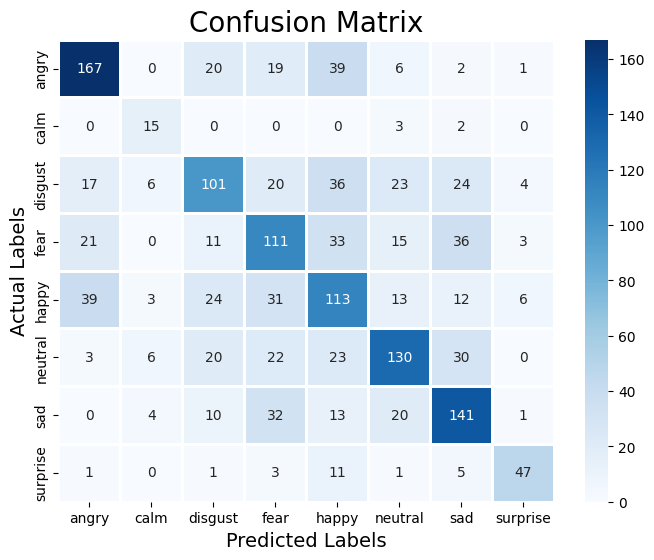

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 6))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.67      0.66      0.67       254
        calm       0.44      0.75      0.56        20
     disgust       0.54      0.44      0.48       231
        fear       0.47      0.48      0.47       230
       happy       0.42      0.47      0.44       241
     neutral       0.62      0.56      0.58       234
         sad       0.56      0.64      0.60       221
    surprise       0.76      0.68      0.72        69

    accuracy                           0.55      1500
   macro avg       0.56      0.58      0.57      1500
weighted avg       0.56      0.55      0.55      1500



In [ ]:
path="/content/drive/MyDrive/Savee/KL_su14.wav"

In [ ]:
data, sampling_rate = librosa.load(path, duration = 2.5,  offset = 0.6)
mfcc_feature = np.mean(librosa.feature.mfcc(y = data, sr = sampling_rate,n_mfcc = 40).T,axis=0)
scaler = StandardScaler()

In [ ]:
mfcc_feature=np.array(mfcc_feature)

In [ ]:
mfcc_feature=pd.DataFrame([mfcc_feature])
mfcc_feature

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-537.861145,110.250183,19.486221,22.777981,-2.677774,-0.785897,-13.973345,-3.535265,-11.562465,-16.117998,...,-0.220666,-0.545879,-0.280868,1.691786,1.668241,-0.482419,2.93551,2.63643,1.945247,1.775284


In [ ]:
mfcc_feature = scaler.fit_transform(mfcc_feature)
mfcc_feature = np.expand_dims(mfcc_feature, axis=2)


In [ ]:
mfcc_feature.shape

(1, 40, 1)

In [ ]:
pred_test = model.predict(mfcc_feature)
y_pred = encoder.inverse_transform(pred_test)

1/1 [==============================] - 0s 34ms/step


In [ ]:
y_pred[0][0]

'disgust'